<a href="https://colab.research.google.com/github/sarannetworkprogammer/Ml_rad/blob/main/oct22_ML_Mnist_Data_set.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [82]:
import torch
import torch.nn as nn
import torchvision
import torchvision.transforms as transforms
import matplotlib.pyplot as plt


In [83]:
# device config

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

In [84]:
# mnist data

train_dataset = torchvision.datasets.MNIST(root='./data', train=True, transform=transforms.ToTensor(),download=True)



test_dataset = torchvision.datasets.MNIST(root='./data', train=False, transform=transforms.ToTensor())



In [85]:

input_size = 784  #28*28
hidden_size = 500
num_classes = 10
num_epochs = 2
batch_size =100
learning_rate = 0.001

In [86]:
# train_Loader
# test_Loader


train_loader = torch.utils.data.DataLoader(dataset=train_dataset, batch_size= batch_size, shuffle=True)

test_loader = torch.utils.data.DataLoader(dataset=test_dataset, batch_size= batch_size, shuffle=False)




torch.Size([100, 1, 28, 28]) torch.Size([100])


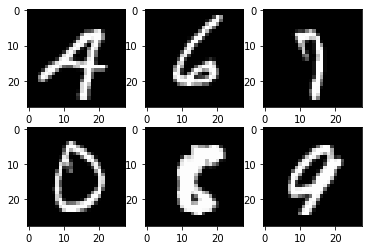

In [87]:
examples = iter(train_loader)
samples, labels = examples.next()
print(samples.shape, labels.shape)

for i in range(6):
  plt.subplot(2,3, i+1)
  plt.imshow(samples[i][0], cmap='gray')

#plt.show()

In [88]:
class NeuralNet(nn.Module):

  def __init__(self, input_size, hidden_size, num_classes):
    super(NeuralNet, self).__init__()
    self.input_size = input_size
    self.l1 = nn.Linear(input_size,hidden_size)
    self.relu = nn.ReLU()
    self.l2 = nn.Linear(hidden_size, num_classes)


  
  def forward(self,x):

    out = self.l1(x)
    out = self.relu(out)
    out = self.l2(out)
    return out
    
model = NeuralNet(input_size, hidden_size, num_classes).to(device)

In [89]:
# loss , optimizer


criterion = nn.CrossEntropyLoss()

optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)

In [90]:
# training loop

n_total_steps = len(train_loader)

print(n_total_steps)


for epoch in range(num_epochs):
  for i, (images, labels) in enumerate(train_loader):
  #100 ,1, 28,28
    images = images.reshape(-1,28*28).to(device)
    labels = labels.to(device)



    # forwardpass

    outputs = model(images)
    loss = criterion(outputs,labels)


    # backwardpass

    optimizer.zero_grad()

    loss.backward()

    optimizer.step()

    if (i+1) % 100 == 0:
      print(f"epoch {epoch +1}/ {num_epochs}, step {i+1}/{n_total_steps}, loss= {loss.item():.4f}")







600
epoch 1/ 2, step 100/600, loss= 0.3295
epoch 1/ 2, step 200/600, loss= 0.2622
epoch 1/ 2, step 300/600, loss= 0.1773
epoch 1/ 2, step 400/600, loss= 0.1210
epoch 1/ 2, step 500/600, loss= 0.1349
epoch 1/ 2, step 600/600, loss= 0.1250
epoch 2/ 2, step 100/600, loss= 0.0956
epoch 2/ 2, step 200/600, loss= 0.1424
epoch 2/ 2, step 300/600, loss= 0.1941
epoch 2/ 2, step 400/600, loss= 0.0995
epoch 2/ 2, step 500/600, loss= 0.0682
epoch 2/ 2, step 600/600, loss= 0.0338


In [91]:
with torch.no_grad():

  n_correct = 0
  n_samples = 0

  for images, labels in test_loader:
    images = images.reshape(-1, 28*28).to(device)
    labels = labels.to(device)
    outputs = model(images)

    # values , index

    _, predictions = torch.max(outputs, 1)
    n_samples += labels.shape[0]
    n_correct += (predictions == labels).sum().item() 

  acc = 100.0 * n_correct / n_samples

  print(f"accuracy = {acc}")



accuracy = 97.19
